# Space project on Astroid detection

In [1]:
#import libreries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
df_impacts = pd.read_csv('impacts.csv')
df_orbits = pd.read_csv('orbits.csv')

In [3]:
df_impacts.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [4]:
df_orbits.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


# Data Overview

In [5]:
df_impacts.columns

Index(['Object Name', 'Period Start', 'Period End', 'Possible Impacts',
       'Cumulative Impact Probability', 'Asteroid Velocity',
       'Asteroid Magnitude', 'Asteroid Diameter (km)',
       'Cumulative Palermo Scale', 'Maximum Palermo Scale',
       'Maximum Torino Scale'],
      dtype='object')

In [6]:
df_orbits.columns

Index(['Object Name', 'Object Classification', 'Epoch (TDB)',
       'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)',
       'Perihelion Argument (deg)', 'Node Longitude (deg)',
       'Mean Anomoly (deg)', 'Perihelion Distance (AU)',
       'Aphelion Distance (AU)', 'Orbital Period (yr)',
       'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference',
       'Asteroid Magnitude'],
      dtype='object')

# Basic Stat about data

In [7]:
#Shape of the data
df_impacts.shape

(683, 11)

In [8]:
#Shape of the data
df_orbits.shape

(15635, 15)

In [9]:
#Info of the data
df_impacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Object Name                    683 non-null    object 
 1   Period Start                   683 non-null    int64  
 2   Period End                     683 non-null    int64  
 3   Possible Impacts               683 non-null    int64  
 4   Cumulative Impact Probability  683 non-null    float64
 5   Asteroid Velocity              683 non-null    float64
 6   Asteroid Magnitude             683 non-null    float64
 7   Asteroid Diameter (km)         683 non-null    float64
 8   Cumulative Palermo Scale       683 non-null    float64
 9   Maximum Palermo Scale          683 non-null    float64
 10  Maximum Torino Scale           683 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 58.8+ KB


In [15]:
df_impacts["Cumulative Impact Probability"] = df_impacts["Cumulative Impact Probability"].apply(np.int64)
df_impacts["Asteroid Velocity"] = df_impacts["Asteroid Velocity"].apply(np.int64)
df_impacts["Asteroid Magnitude"] = df_impacts["Asteroid Magnitude"].apply(np.int64)
df_impacts["Asteroid Diameter (km)"] = df_impacts["Asteroid Diameter (km)"].apply(np.int64)
df_impacts["Cumulative Palermo Scale"] = df_impacts["Cumulative Palermo Scale"].apply(np.int64)
df_impacts["Maximum Palermo Scale"] = df_impacts["Maximum Palermo Scale"].apply(np.int64)

In [16]:
#Info of the data
df_impacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Object Name                    683 non-null    object
 1   Period Start                   683 non-null    int64 
 2   Period End                     683 non-null    int64 
 3   Possible Impacts               683 non-null    int64 
 4   Cumulative Impact Probability  683 non-null    int64 
 5   Asteroid Velocity              683 non-null    int64 
 6   Asteroid Magnitude             683 non-null    int64 
 7   Asteroid Diameter (km)         683 non-null    int64 
 8   Cumulative Palermo Scale       683 non-null    int64 
 9   Maximum Palermo Scale          683 non-null    int64 
 10  Maximum Torino Scale           683 non-null    object
dtypes: int64(9), object(2)
memory usage: 58.8+ KB


In [54]:
#Info of the data
df_orbits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Object Classification                     15635 non-null  object 
 2   Epoch (TDB)                               15635 non-null  int64  
 3   Orbit Axis (AU)                           15635 non-null  float64
 4   Orbit Eccentricity                        15635 non-null  float64
 5   Orbit Inclination (deg)                   15635 non-null  float64
 6   Perihelion Argument (deg)                 15635 non-null  float64
 7   Node Longitude (deg)                      15635 non-null  float64
 8   Mean Anomoly (deg)                        15635 non-null  float64
 9   Perihelion Distance (AU)                  15635 non-null  float64
 10  Aphelion Distance (AU)            

In [63]:
df_orbits["Orbit Axis (AU)"] = df_orbits["Orbit Axis (AU)"].apply(np.int64)
df_orbits["Orbit Eccentricity"] = df_orbits["Orbit Eccentricity"].apply(np.int64)
df_orbits["Orbit Inclination (deg)"] = df_orbits["Orbit Inclination (deg)"].apply(np.int64)
df_orbits["Perihelion Argument (deg)"] = df_orbits["Perihelion Argument (deg)"].apply(np.int64)
df_orbits["Node Longitude (deg)"] = df_orbits["Node Longitude (deg)"].apply(np.int64)
df_orbits["Mean Anomoly (deg)"] = df_orbits["Mean Anomoly (deg)"].apply(np.int64)
df_orbits["Perihelion Distance (AU)"] = df_orbits["Perihelion Distance (AU)"].apply(np.int64)
df_orbits["Aphelion Distance (AU)"] = df_orbits["Aphelion Distance (AU)"].apply(np.int64)
df_orbits["Orbital Period (yr)"] = df_orbits["Orbital Period (yr)"].apply(np.int64)
df_orbits["Minimum Orbit Intersection Distance (AU)"] = df_orbits["Minimum Orbit Intersection Distance (AU)"].apply(np.int64)
#df_orbits["Asteroid Magnitude "] = df_orbits["Asteroid Magnitude"].apply(np.int64)

In [64]:
#Info of the data
df_orbits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Object Classification                     15635 non-null  object 
 2   Epoch (TDB)                               15635 non-null  int64  
 3   Orbit Axis (AU)                           15635 non-null  int64  
 4   Orbit Eccentricity                        15635 non-null  int64  
 5   Orbit Inclination (deg)                   15635 non-null  int64  
 6   Perihelion Argument (deg)                 15635 non-null  int64  
 7   Node Longitude (deg)                      15635 non-null  int64  
 8   Mean Anomoly (deg)                        15635 non-null  int64  
 9   Perihelion Distance (AU)                  15635 non-null  int64  
 10  Aphelion Distance (AU)            

In [65]:
#Find the nulls present in the data
df_impacts.isnull().sum()

Object Name                      0
Period Start                     0
Period End                       0
Possible Impacts                 0
Cumulative Impact Probability    0
Asteroid Velocity                0
Asteroid Magnitude               0
Asteroid Diameter (km)           0
Cumulative Palermo Scale         0
Maximum Palermo Scale            0
Maximum Torino Scale             0
dtype: int64

In [66]:
#Find the nulls present in the data
df_orbits.isnull().sum()

Object Name                                 0
Object Classification                       0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          1
dtype: int64

In [67]:
#Find the percentage of null values
df_orbits.isnull().sum()/len(df_orbits)*100

Object Name                                 0.000000
Object Classification                       0.000000
Epoch (TDB)                                 0.000000
Orbit Axis (AU)                             0.000000
Orbit Eccentricity                          0.000000
Orbit Inclination (deg)                     0.000000
Perihelion Argument (deg)                   0.000000
Node Longitude (deg)                        0.000000
Mean Anomoly (deg)                          0.000000
Perihelion Distance (AU)                    0.000000
Aphelion Distance (AU)                      0.000000
Orbital Period (yr)                         0.000000
Minimum Orbit Intersection Distance (AU)    0.000000
Orbital Reference                           0.000000
Asteroid Magnitude                          0.006396
dtype: float64

In [68]:
#Find the percentage of null values in the column
#Find the percentage of null values
df_orbits['Asteroid Magnitude'].isnull().sum()/df_orbits.shape[0]*100

0.0063959066197633516

In [69]:
#Find the mean of the Sales column
df_orbits['Asteroid Magnitude'].mean()

22.28633555072282

In [70]:
# Fill the na values with the mean of the same column
df_orbits['Asteroid Magnitude'].fillna(df_orbits['Asteroid Magnitude'].mean(),inplace=True)

In [71]:
#Check the actions
df_orbits.isnull().sum()/len(df_orbits)*100

Object Name                                 0.0
Object Classification                       0.0
Epoch (TDB)                                 0.0
Orbit Axis (AU)                             0.0
Orbit Eccentricity                          0.0
Orbit Inclination (deg)                     0.0
Perihelion Argument (deg)                   0.0
Node Longitude (deg)                        0.0
Mean Anomoly (deg)                          0.0
Perihelion Distance (AU)                    0.0
Aphelion Distance (AU)                      0.0
Orbital Period (yr)                         0.0
Minimum Orbit Intersection Distance (AU)    0.0
Orbital Reference                           0.0
Asteroid Magnitude                          0.0
dtype: float64

In [74]:
df_orbits["Asteroid Magnitude"] = df_orbits["Asteroid Magnitude"].apply(np.int64)

In [75]:
#Info of the data
df_orbits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Object Name                               15635 non-null  object
 1   Object Classification                     15635 non-null  object
 2   Epoch (TDB)                               15635 non-null  int64 
 3   Orbit Axis (AU)                           15635 non-null  int64 
 4   Orbit Eccentricity                        15635 non-null  int64 
 5   Orbit Inclination (deg)                   15635 non-null  int64 
 6   Perihelion Argument (deg)                 15635 non-null  int64 
 7   Node Longitude (deg)                      15635 non-null  int64 
 8   Mean Anomoly (deg)                        15635 non-null  int64 
 9   Perihelion Distance (AU)                  15635 non-null  int64 
 10  Aphelion Distance (AU)                    1563

# Univariate analysis

In [19]:
#impact dataset
df_impacts.columns

Index(['Object Name', 'Period Start', 'Period End', 'Possible Impacts',
       'Cumulative Impact Probability', 'Asteroid Velocity',
       'Asteroid Magnitude', 'Asteroid Diameter (km)',
       'Cumulative Palermo Scale', 'Maximum Palermo Scale',
       'Maximum Torino Scale'],
      dtype='object')

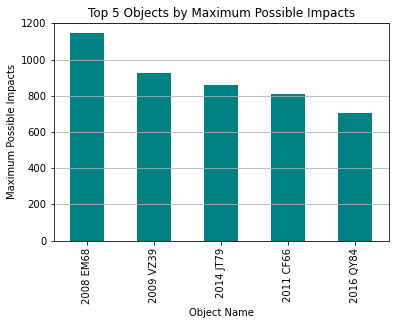

In [32]:
# Assuming df_impacts is your DataFrame and it has been loaded correctly
# Group by 'Object Name' and find the maximum 'Possible Impacts' for each object
max_impacts = df_impacts.groupby('Object Name')['Possible Impacts'].max()

# Sort the results to get the top objects by maximum possible impacts
max_impacts_sorted = max_impacts.sort_values(ascending=False).head()

# Plot the results
max_impacts_sorted.plot(kind="bar", color="teal")
plt.title("Top 5 Objects by Maximum Possible Impacts")
plt.xlabel("Object Name")
plt.ylabel("Maximum Possible Impacts")
plt.grid(axis='y')

# Show the plot
plt.show()

In [80]:
#Show the name of the Region
df_impacts['Possible Impacts'].head(5).index

RangeIndex(start=0, stop=5, step=1)

<AxesSubplot:ylabel='Density'>

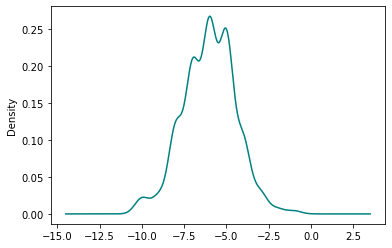

In [48]:
#Draw the kde plot
df_impacts['Cumulative Palermo Scale'].plot(kind="kde",color="teal")

In [87]:
df_impacts['Cumulative Palermo Scale'].mean()

-6.014641288433382

<AxesSubplot:ylabel='Density'>

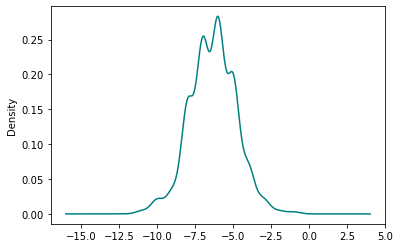

In [49]:
#Draw the kde plot
df_impacts['Maximum Palermo Scale'].plot(kind="kde",color="teal")

In [88]:
df_impacts['Maximum Palermo Scale'].mean()

-6.330893118594436

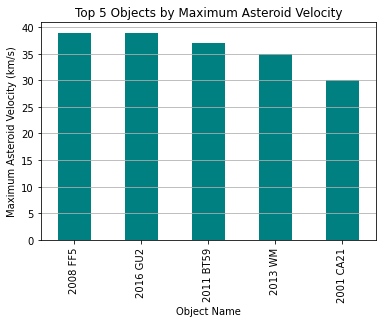

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_impacts is your DataFrame and it has been loaded correctly
# Group by 'Object Name' and find the maximum 'Asteroid Velocity' for each object
max_velocity = df_impacts.groupby('Object Name')['Asteroid Velocity'].max()

# Sort the results to get the top objects by maximum asteroid velocity
max_velocity_sorted = max_velocity.sort_values(ascending=False).head(5)

# Plot the results
max_velocity_sorted.plot(kind="bar", color="teal")
plt.title("Top 5 Objects by Maximum Asteroid Velocity")
plt.xlabel("Object Name")
plt.ylabel("Maximum Asteroid Velocity (km/s)")
plt.grid(axis='y')

# Show the plot
plt.show()


<AxesSubplot:ylabel='Density'>

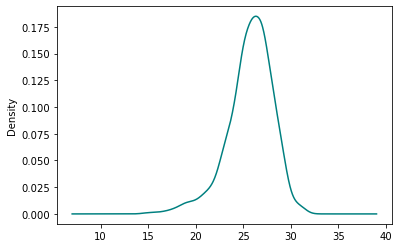

In [53]:
#Draw the kde plot
df_impacts['Asteroid Magnitude'].plot(kind="kde",color="teal")

In [89]:
df_impacts['Asteroid Magnitude'].mean()

25.708638360175694